In [16]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

In [42]:
#define parameters
steps = 20
epochs = 25
batch_size = 8

In [43]:
!../../keras-retinanet/keras_retinanet/bin/train.py --steps 20 --epochs 25 --snapshot-path /home/paperspace/HPM/keras-retinanet/snapshots \
--weights /home/paperspace/HPM/keras-retinanet/models/resnet50_coco_best_v2.1.0.h5 \
--no-resize --batch-size 8 \
--compute-val-loss\
csv /home/paperspace/HPM/data/Create-CSV-dataset/train_set.csv /home/paperspace/HPM/data/Create-CSV-dataset/classes.csv \
--val-annotations /home/paperspace/HPM/data/Create-CSV-dataset/val_set.csv 

Using TensorFlow backend.
2020-03-02 04:34:16.607144: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2020-03-02 04:34:16.608593: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
usage: train.py [-h]
                [--snapshot SNAPSHOT | --imagenet-weights | --weights WEIGHTS | --no-weights]
                [--backbone BACKBONE] [--batch-size BATCH_SIZE] [--gpu GPU]
                [--multi-gpu MULTI_GPU] [--multi-gpu-force]
                [--initial-epoch INITIAL_EPOCH] [--epochs EPOCHS]
                [--steps STEPS] [--lr LR] [--snapshot-path SNAPSHOT_PATH]
                [--tensorboard-dir TENSORBOARD_DIR] [--no-snapshots]
                [--no-evaluation] [--freeze-backbone] [--random-transform]
                [--image-min-side IMAGE_MIN_SIDE]
                [--image-max-side IMAGE_MAX_SIDE] [--no-resize]
                [--config CONF

In [40]:
loss_data = genfromtxt('losses1.csv', delimiter=',')
loss_data = loss_data.T
print(loss_data)

[[2.41304793 2.00286247 1.80552362 1.57940582 1.33909277 1.06561115
  0.86463025 0.80692291 0.74799513 0.64312502 0.62443958 0.55990863
  0.54203992 0.51410457 0.49642038 0.4955871  0.48922198 0.44423966
  0.45002827 0.44900193 0.43141809 0.41751434 0.4309781  0.43106876
  0.43247773]
 [2.21392488 1.95667768 1.77084601 1.56037474 1.34904289 1.14953625
  0.98464596 0.86217999 0.78585231 0.7253086  0.6880222  0.65841407
  0.64120293 0.62753594 0.61028403 0.60425878 0.58685243 0.57881606
  0.57397497 0.56554246 0.56096911 0.56073439 0.55926275 0.5579294
  0.55770564]]


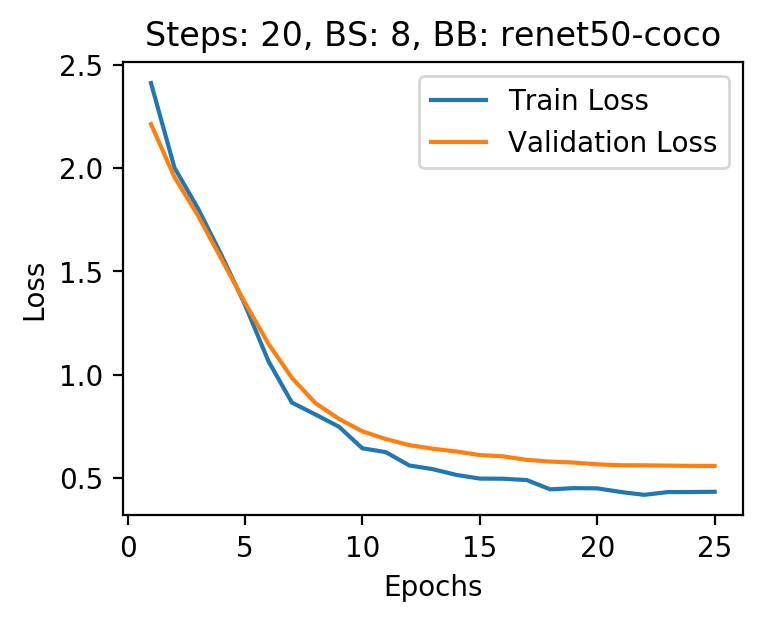

In [50]:
plt.figure(figsize=(4, 3), dpi=200)
plt.plot(range(1, 1 + len(loss_data[0])), loss_data[0])
plt.plot(range(1, 1 + len(loss_data[1])), loss_data[1])
plt.legend(['Train Loss','Validation Loss'])
plt.title('Steps: 20, BS: 8, BB: renet50-coco')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('./train-val-loss.png',bbox_inches='tight')